# Iris Species Classification 

### Group 126: Manya Jain, Zhuohang Lyu, Chang Sun

# Introduction

Iris is a genus of flowering plants with 310 recognised species with vivid flowers. Iris is both the common name and the scientific name for all species of Iris, as well as some species from other closely related genera.

### Question:
We shall answer the following question: Can we distinguish among the species of the iris plant?

# Methods And Results:

It contains information about each flower's characteristics about three iris species (Iris setosa, Iris virginica and Iris versicolor)  with 50 samples each. 

Firstly, we will load the required packages in R. 

In [1]:
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Reading The Dataset

The dataset that we will be using for the analysis is a multivariable dataset, “Iris flower dataset”, also known as “Fisher’s Iris data set”. The Iris dataset, which is also available on the UCI Machine Learning Repository, was utilised in R.A. Fisher's 1936 landmark paper ‘The Use of Multiple Measurements in Taxonomic Problems’.

It contains information about each flower's characteristics about three iris species (Iris setosa, Iris virginica and Iris versicolor)  with 50 samples each. 

Then, we load the dataset from the link "https://raw.githubusercontent.com/SunChang666/dsci126/main/Iris.csv" in GITHUB by using the read_delim function.

In [2]:
url = "https://raw.githubusercontent.com/SunChang666/dsci126/main/Iris.csv"
iris<- read_delim(url,
                  delim=",",
                  col_names=TRUE)
iris

Rows: 150 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Species
dbl (5): Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


### Cleaning the dataset

Now we are trying to make the oringinal data tidy because there are something useless or incorrect in the dataset. We first convert the "Species" column from character to factor by using the `mutate` function. Moreover, we need to remove the "Id" column since the "Id" column is not useful for our following process.

In [3]:
iris_tidy <- iris|>
mutate(Species = as.factor(Species))|>
select(!Id)
iris_tidy

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


According to the golden rule of machine learning, we should always split the dataset into training data and testing data and only use the training data to create the classifier. The testing data will be used as the "test" to evaluate the accuracy of this classifier. We will set `seed 200` here to make our prediction randomly and reproducible. We use 80 percent data of the oringinal dataset by using `prop=0.8`.

In [4]:
set.seed(200)
iris_split <- initial_split(iris_tidy, prop= 0.8, strata= Species)
iris_train <- training(iris_split)
iris_test <- testing(iris_split)
iris_split

<Training/Testing/Total>
<120/30/150>

Below, we set `seed 300` construct the recipe with training data and scaling all of the training data.

In [5]:
set.seed(300)

iris_recipe <- recipe(Species ~., data = iris_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
iris_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Since we still have no idea of the value of neighbors, we write tune in neighbors to find the best value of k.

In [6]:
knn_spec<-nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We will use the cross-validation method below.

In [7]:
iris_vfold<-vfold_cv(iris_train,v=5,strata=Species)

We create a tibble that includes the sequence from 1 to 91 below.

In [34]:
gridvals<-tibble(neighbors = seq(1,30))

We need to create a model specification, combine the model specification and recipe into a workflow, and then use `tune_grid` with resamples `iris vfold` and `tibble gridvals`.

In [35]:
iris_results<-workflow()|>
add_recipe(iris_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples = iris_vfold, grid=gridvals)|>
collect_metrics()

iris_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9166667,5,0.029462783,Preprocessor1_Model01
1,roc_auc,hand_till,0.9375000,5,0.022097087,Preprocessor1_Model01
2,accuracy,multiclass,0.9166667,5,0.029462783,Preprocessor1_Model02
2,roc_auc,hand_till,0.9596354,5,0.018414239,Preprocessor1_Model02
3,accuracy,multiclass,0.9416667,5,0.021245915,Preprocessor1_Model03
3,roc_auc,hand_till,0.9755208,5,0.010139543,Preprocessor1_Model03
4,accuracy,multiclass,0.9416667,5,0.021245915,Preprocessor1_Model04
4,roc_auc,hand_till,0.9789062,5,0.008601638,Preprocessor1_Model04
5,accuracy,multiclass,0.9333333,5,0.021245915,Preprocessor1_Model05


In [36]:
#description

In [37]:
accuracies<-iris_results|>
filter(.metric=="accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9166667,5,0.02946278,Preprocessor1_Model01
2,accuracy,multiclass,0.9166667,5,0.02946278,Preprocessor1_Model02
3,accuracy,multiclass,0.9416667,5,0.02124591,Preprocessor1_Model03
4,accuracy,multiclass,0.9416667,5,0.02124591,Preprocessor1_Model04
5,accuracy,multiclass,0.9333333,5,0.02124591,Preprocessor1_Model05
6,accuracy,multiclass,0.9333333,5,0.02124591,Preprocessor1_Model06
7,accuracy,multiclass,0.9750000,5,0.01020621,Preprocessor1_Model07
8,accuracy,multiclass,0.9750000,5,0.01020621,Preprocessor1_Model08
9,accuracy,multiclass,0.9500000,5,0.01559024,Preprocessor1_Model09


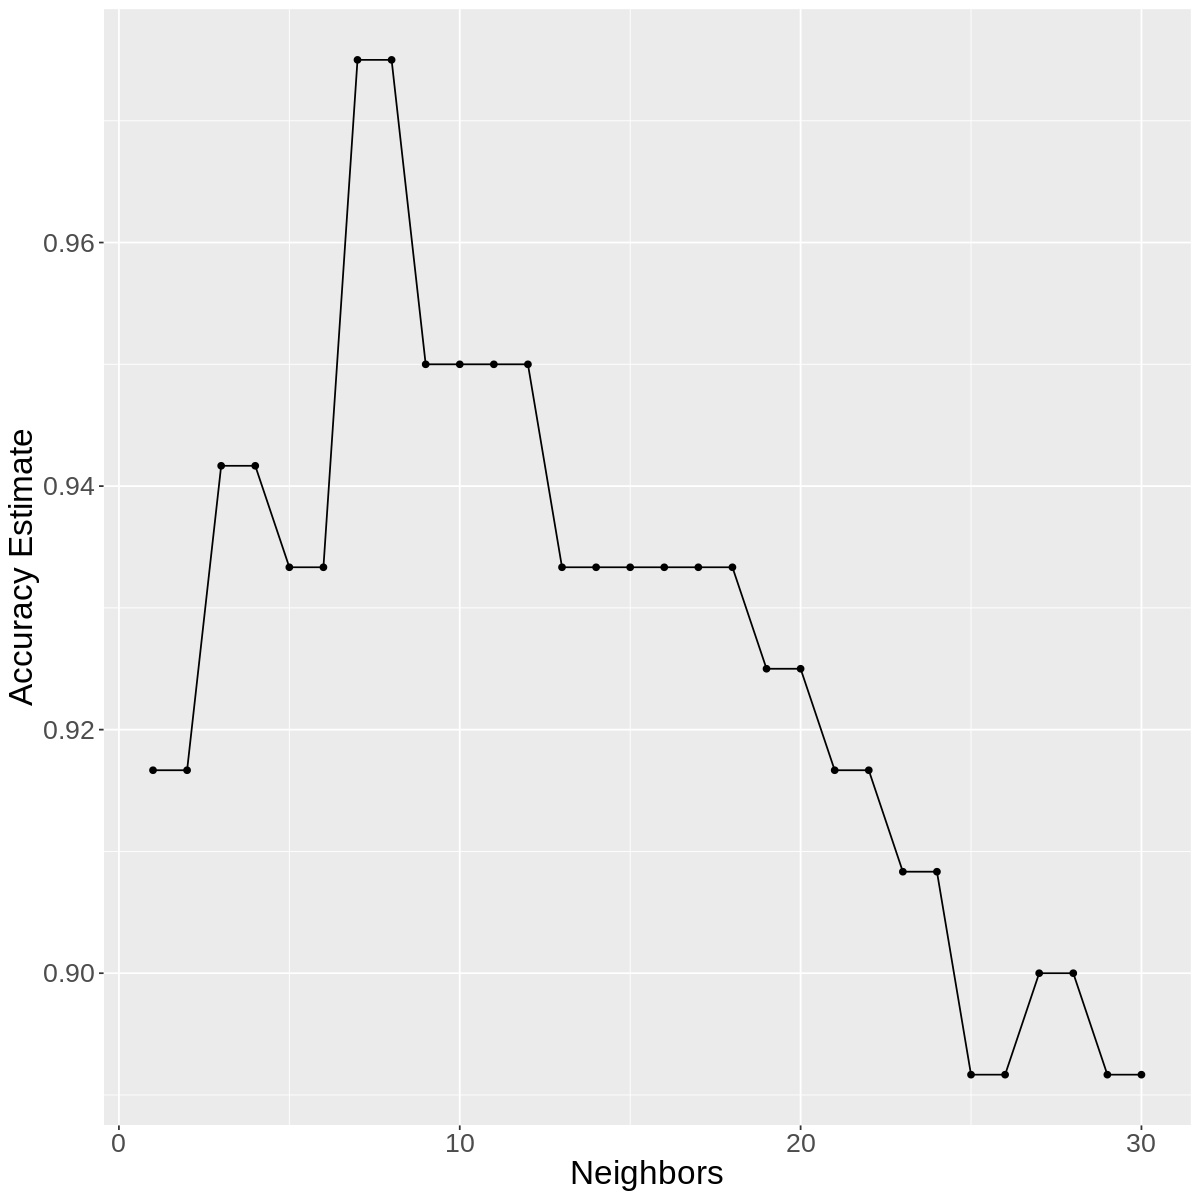

In [38]:
options(repr.plot.width = 10, repr.plot.height = 10)
iris_val_plot<-accuracies|>
ggplot(aes(x = neighbors,y=mean))+
geom_line()+
geom_point()+
labs(x="Neighbors",y="Accuracy Estimate")+
theme(text = element_text(size = 20))
iris_val_plot

According to the graph above, we choose 10 as the value of neighbors.

In [63]:

knn_best_spec<-nearest_neighbor(weight_func = "rectangular", neighbors = 10)|>
set_engine("kknn")|>
set_mode("classification")

iris_fit<-workflow()|>
add_recipe(iris_recipe)|>
add_model(knn_best_spec)|>
fit(data=iris_train)

In [64]:
iris_predictions<- predict(iris_fit,iris_test)|>
bind_cols(iris_test)
iris_predictions

.pred_class,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Iris-setosa,4.9,3.0,1.4,0.2,Iris-setosa
Iris-setosa,4.4,2.9,1.4,0.2,Iris-setosa
Iris-setosa,4.9,3.1,1.5,0.1,Iris-setosa
Iris-setosa,4.8,3.4,1.6,0.2,Iris-setosa
Iris-setosa,4.8,3.0,1.4,0.1,Iris-setosa
Iris-setosa,5.7,4.4,1.5,0.4,Iris-setosa
Iris-setosa,5.4,3.4,1.7,0.2,Iris-setosa
Iris-setosa,4.8,3.4,1.9,0.2,Iris-setosa
Iris-setosa,5.4,3.4,1.5,0.4,Iris-setosa


In [72]:
iris_accuracy<-iris_predictions|>
metrics(truth= Species,estimate=.pred_class)|>
select(.metric,.estimate)|>
head(1)
iris_accuracy

.metric,.estimate
<chr>,<dbl>
accuracy,0.9666667


In [71]:
iris_cm<-iris_predictions|>
conf_mat(truth = Species,estimate=.pred_class)
iris_cm

                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              1
  Iris-virginica            0               0              9

However, according to the visualizations of the dataset below, we find out that the species may have a stronger relationship to "Petal" part. Thus, we want to figure out the different accuracies by using only the "Sepal" part variables and the "Petal" part variables.

In [50]:
#adding the visulaizations

We would like to split the data to "Sepal" and "Petal" into two different parts. 

For the `Sepal` part, by repeating the process we have done above for the whole dataset.

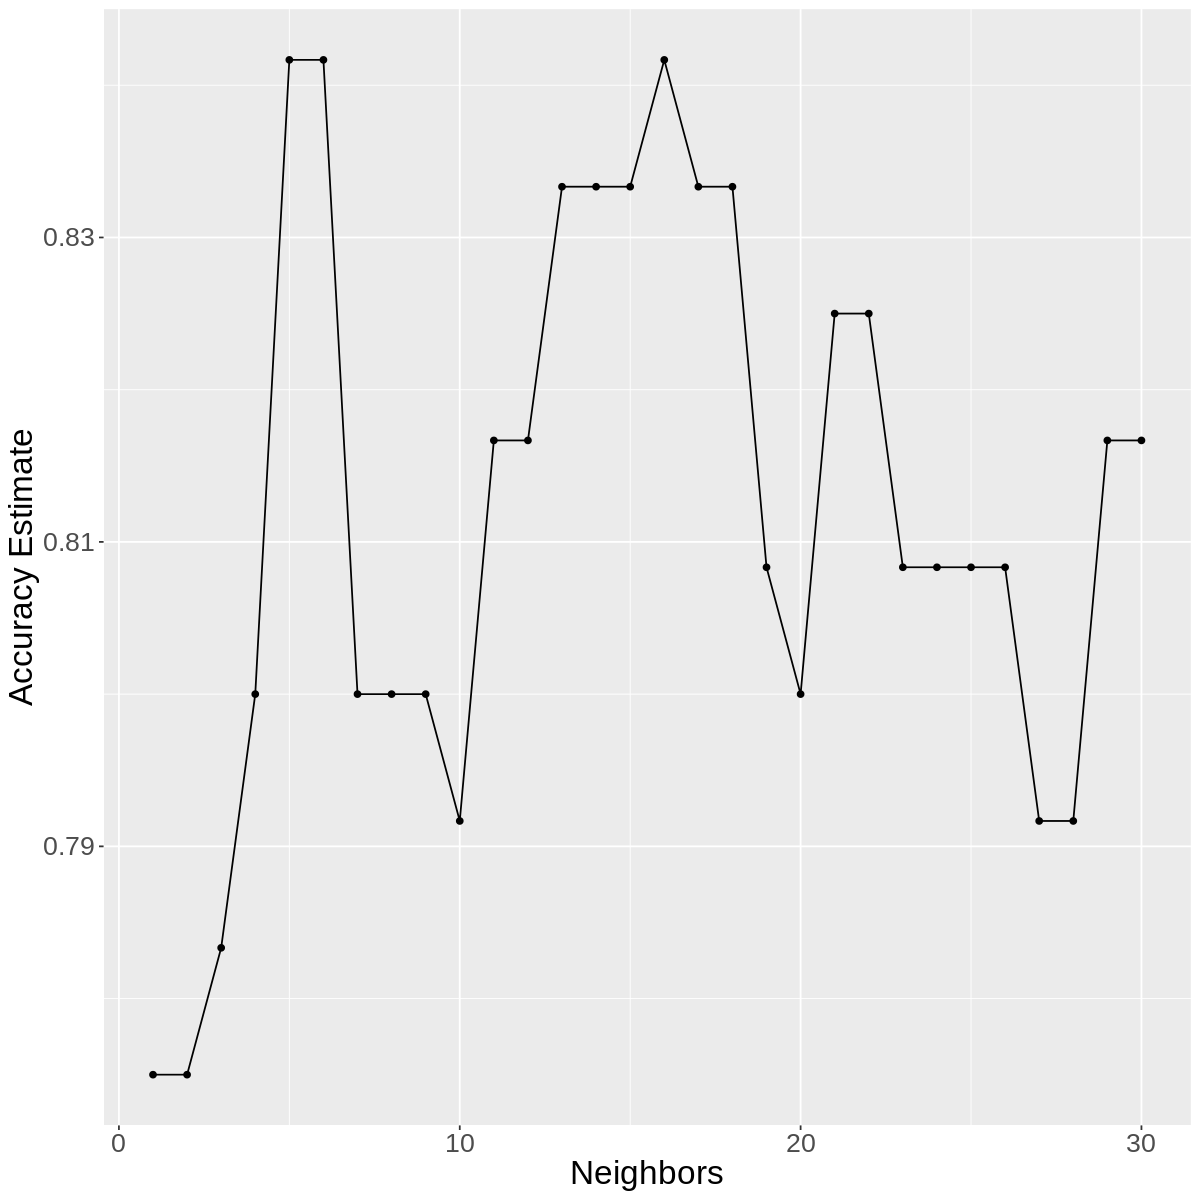

In [51]:
iris_sepal<-select(iris_tidy,SepalLengthCm,SepalWidthCm,Species)

set.seed(200)
iris_split_sepal <- initial_split(iris_sepal, prop= 0.8, strata= Species)
iris_train_sepal <- training(iris_split_sepal)
iris_test_sepal <- testing(iris_split_sepal)

set.seed(300)
iris_recipe_sepal <- recipe(Species ~., data = iris_train_sepal) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

iris_vfold_sepal<-vfold_cv(iris_train_sepal,v=5,strata=Species)

iris_results_sepal<-workflow()|>
add_recipe(iris_recipe_sepal)|>
add_model(knn_spec)|>
tune_grid(resamples = iris_vfold_sepal, grid=gridvals)|>
collect_metrics()

accuracies_sepal<-iris_results_sepal|>
filter(.metric=="accuracy")

options(repr.plot.width = 10, repr.plot.height = 10)

iris_val_plot_sepal<-accuracies_sepal|>
ggplot(aes(x = neighbors,y=mean))+
geom_line()+
geom_point()+
labs(x="Neighbors",y="Accuracy Estimate")+
theme(text = element_text(size = 20))
iris_val_plot_sepal

According to the graph above, we choose 14 as the value of neighbors.

In [73]:


knn_best_spec_sepal<-nearest_neighbor(weight_func = "rectangular", neighbors = 14)|>
set_engine("kknn")|>
set_mode("classification")

iris_fit_sepal<-workflow()|>
add_recipe(iris_recipe_sepal)|>
add_model(knn_best_spec_sepal)|>
fit(data=iris_train_sepal)

iris_predictions_sepal<- predict(iris_fit_sepal,iris_test_sepal)|>
bind_cols(iris_test_sepal)
iris_predictions_sepal

iris_accuracy_sepal<-iris_predictions_sepal|>
metrics(truth= Species,estimate=.pred_class)|>
select(.metric,.estimate)|>
head(1)
iris_accuracy_sepal

iris_cm_sepal<-iris_predictions_sepal|>
conf_mat(truth = Species,estimate=.pred_class)
iris_cm_sepal

.pred_class,SepalLengthCm,SepalWidthCm,Species
<fct>,<dbl>,<dbl>,<fct>
Iris-setosa,4.9,3.0,Iris-setosa
Iris-setosa,4.4,2.9,Iris-setosa
Iris-setosa,4.9,3.1,Iris-setosa
Iris-setosa,4.8,3.4,Iris-setosa
Iris-setosa,4.8,3.0,Iris-setosa
Iris-setosa,5.7,4.4,Iris-setosa
Iris-setosa,5.4,3.4,Iris-setosa
Iris-setosa,4.8,3.4,Iris-setosa
Iris-setosa,5.4,3.4,Iris-setosa


.metric,.estimate
<chr>,<dbl>
accuracy,0.7


                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0               4              3
  Iris-virginica            0               6              7

For the `Petal` part, by repeating the process we have done above for the whole dataset.

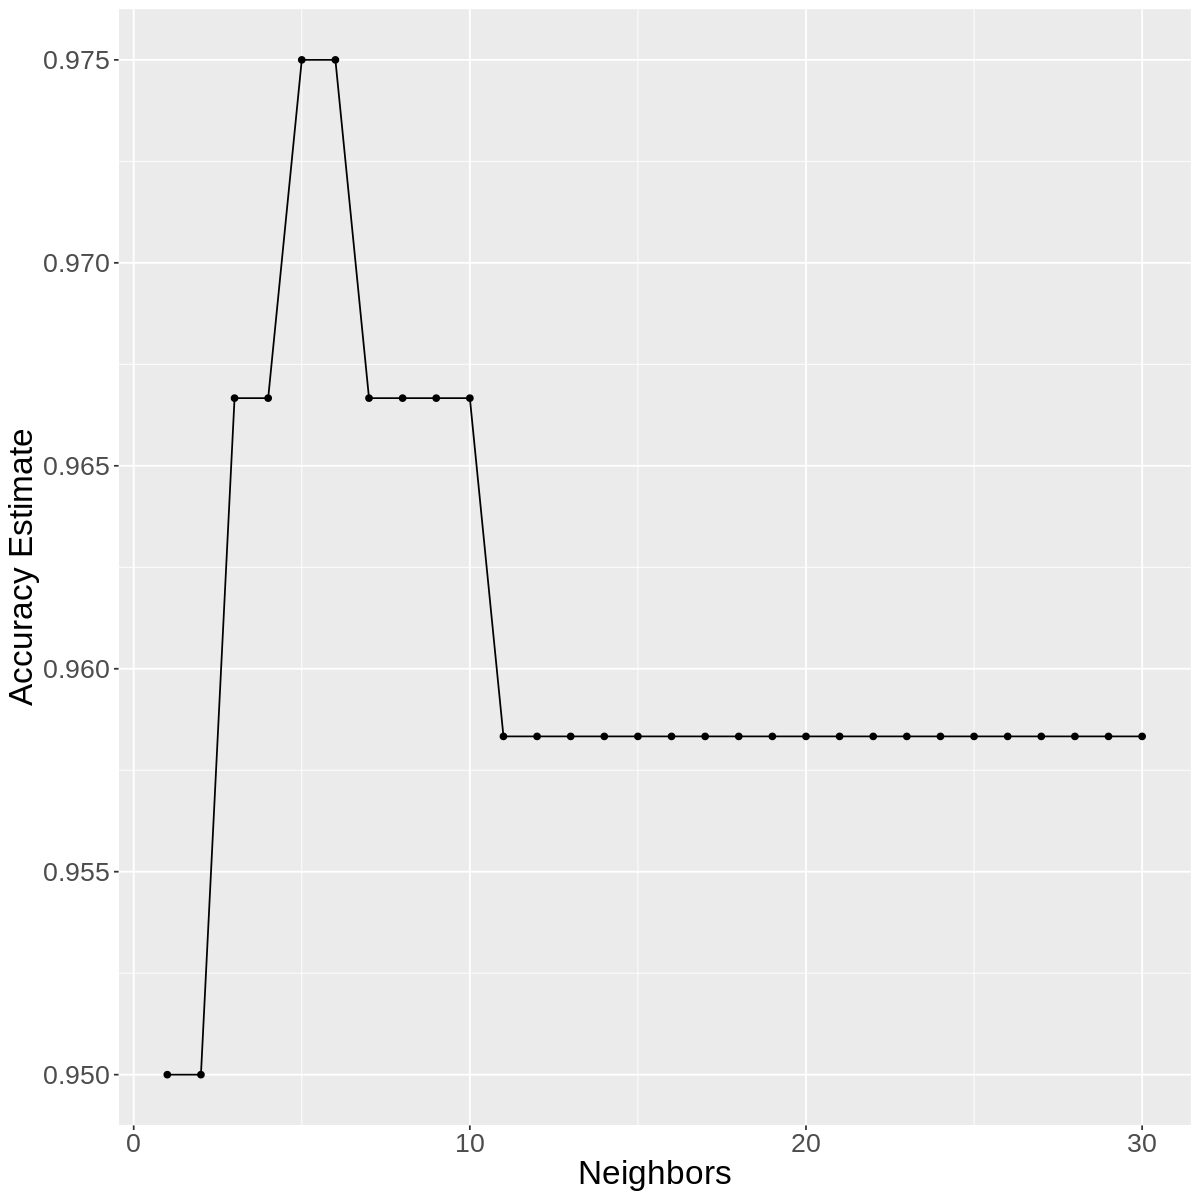

In [74]:
iris_petal<-select(iris_tidy,PetalLengthCm,PetalWidthCm,Species)

set.seed(200)
iris_split_petal <- initial_split(iris_petal, prop= 0.8, strata= Species)
iris_train_petal <- training(iris_split_petal)
iris_test_petal <- testing(iris_split_petal)

set.seed(300)
iris_recipe_petal <- recipe(Species ~., data = iris_train_petal) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

iris_vfold_petal<-vfold_cv(iris_train_petal,v=5,strata=Species)

iris_results_petal<-workflow()|>
add_recipe(iris_recipe_petal)|>
add_model(knn_spec)|>
tune_grid(resamples = iris_vfold_petal, grid=gridvals)|>
collect_metrics()

accuracies_petal<-iris_results_petal|>
filter(.metric=="accuracy")

options(repr.plot.width = 10, repr.plot.height = 10)

iris_val_plot_petal<-accuracies_petal|>
ggplot(aes(x = neighbors,y=mean))+
geom_line()+
geom_point()+
labs(x="Neighbors",y="Accuracy Estimate")+
theme(text = element_text(size = 20))
iris_val_plot_petal

We choose 25 as the value of k-neighbors.

In [75]:

knn_best_spec_petal<-nearest_neighbor(weight_func = "rectangular", neighbors = 25)|>
set_engine("kknn")|>
set_mode("classification")

iris_fit_petal<-workflow()|>
add_recipe(iris_recipe_petal)|>
add_model(knn_best_spec_petal)|>
fit(data=iris_train_petal)

iris_predictions_petal<- predict(iris_fit_petal,iris_test_petal)|>
bind_cols(iris_test_petal)
iris_predictions_petal

iris_accuracy_petal<-iris_predictions_petal|>
metrics(truth= Species,estimate=.pred_class)|>
select(.metric,.estimate)|>
head(1)
iris_accuracy_petal

iris_cm_petal<-iris_predictions_petal|>
conf_mat(truth = Species,estimate=.pred_class)
iris_cm_petal

.pred_class,PetalLengthCm,PetalWidthCm,Species
<fct>,<dbl>,<dbl>,<fct>
Iris-setosa,1.4,0.2,Iris-setosa
Iris-setosa,1.4,0.2,Iris-setosa
Iris-setosa,1.5,0.1,Iris-setosa
Iris-setosa,1.6,0.2,Iris-setosa
Iris-setosa,1.4,0.1,Iris-setosa
Iris-setosa,1.5,0.4,Iris-setosa
Iris-setosa,1.7,0.2,Iris-setosa
Iris-setosa,1.9,0.2,Iris-setosa
Iris-setosa,1.5,0.4,Iris-setosa


.metric,.estimate
<chr>,<dbl>
accuracy,0.9666667


                 Truth
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              1
  Iris-virginica            0               0              9

By putting together the three accuracies, we can find out that the petal part variable has a much higher accuracy than others.

In [76]:
iris_accuracy
iris_accuracy_sepal
iris_accuracy_petal

.metric,.estimate
<chr>,<dbl>
accuracy,0.9666667


.metric,.estimate
<chr>,<dbl>
accuracy,0.7


.metric,.estimate
<chr>,<dbl>
accuracy,0.9666667


# Methods

We intend to perform classification by stratifying the dataset by species.

 These are the columns in this dataset: 

* Id
* SepalLengthCm 
* SepalWidthCm 
* PetalLengthCm 
* PetalWidthCm 
* Species

The predictors we will be using are: SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm. 
We will visualize using scatter plot: In order to investigate the relationship between individual predictors based on iris species, scatterplot may be a better choice because the scatterplot is a type of data display that demonstrates the connection between two numerical variables.

# Expected outcomes and significance:

In this project we expect to be able to identify the species of iris by the shape of its sepals and petals (length and width). Based on this data, more species of iris can be identified, which may facilitate the selecting and breeding of better varieties.